In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [4]:
data = pd.read_csv("LendingGame3_Round3/PastLoans.csv")

In [5]:
data.set_index('id', inplace=True)

In [6]:
data.columns

Index(['sex', 'married', 'employment', 'income', 'digital1', 'digital2',
       'digital3', 'default'],
      dtype='object')

In [7]:
for col in ["sex", "employment", "default"]:
    data[col] = data[col].astype("category")

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[:-1]], data["default"], test_size=0.2)

In [9]:
numerical_features = ["married", "income", "digital1", "digital2", "digital3"]

categorical_features = ["sex", "employment"]
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)

In [10]:
pipe = make_pipeline(preprocessor, StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train);

In [11]:
pipe.score(X_test, y_test)

0.81915

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/var/folders/q6/rqx7by952vl927kfl2fslt5h0000gn/T/ipykernel_65448/1217576733.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(features_names, rotation=30, ha="right");


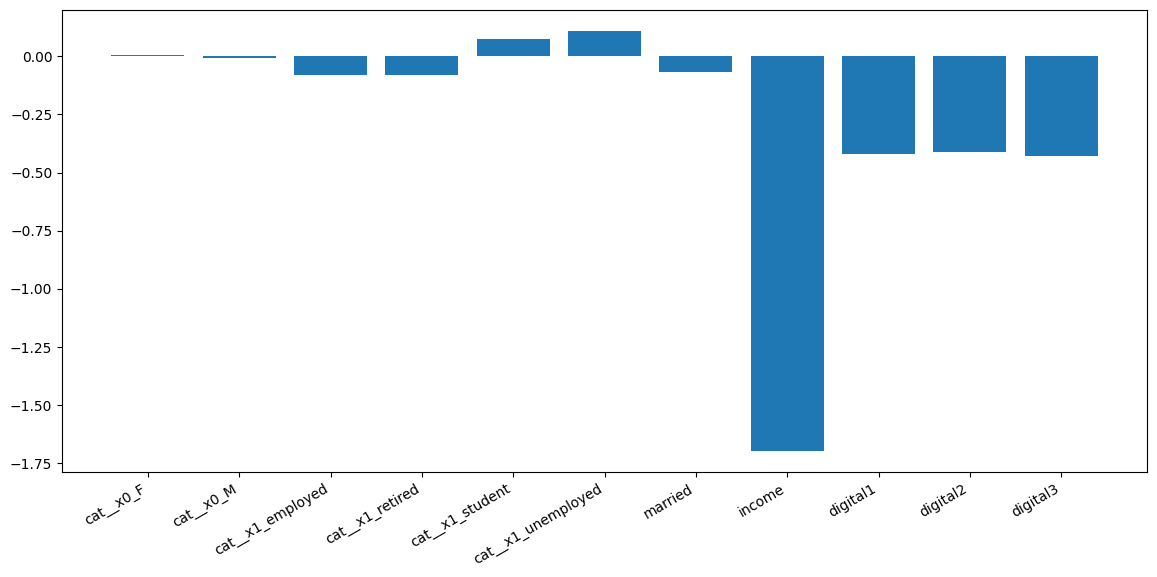

In [12]:
fig, ax = plt.subplots(figsize=(14,6))
features_names = pipe.steps[0][1].get_feature_names()
coefs = pipe.steps[2][1].coef_

ax.bar(features_names, coefs.reshape((coefs.shape[1],)))
ax.set_xticklabels(features_names, rotation=30, ha="right");